<a href="https://colab.research.google.com/github/KanielDatz/Projects/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## literature and pre-assignment research
To better handle the data and build a good model it is important to understand the data source, the porpuse of the model and the busness needs.
thus i'll start the assignment in research about the theme.

loan landing business rely strongly on risk management.
The business has to trade off between two factors -
- Increasing the amount of loans given, to increase income.
- Decreasing the amount of unreturned loans, to decrease loss of funds.
Different business models and approaches where given for the optimization of these two factors.
- Credit risk management, scoring systems, risk-dependant interest rate and setra.
In this task we want to develop a risk assessment tool, that will help optimize this two factors.
for each loan application, we want to be able to predict as good as possible if the applicant will be able to return the loan.
By the results of the prediction the lender will be able to assess what are the best loan terms it can fit to the client and which clients should it avoid.

# Our data - LendingClub loan Data 2007- 2018
LC is a P2P landing platform that operates in the US. It was the first p2p lender to be approved by the SEC.
P2P loans are usually medium amount loans (500$-40,000$) for a medium term- 1-2 years.
I want cover the business model of p2p landing but it is important to understand there are 3 key stakeholders in this credit landing model.
The Bank - LC - is in charge of the verification of the loan applications and the funds handling. LC is also in charge of off charges and insurance of investors money.
The investors - They invest the capital for the loan. They are usually mid - class people who seek for a safe investment with good interest.
The Loan borrowers - as the caption states, they apply for the loan.

Our dataset contains only approved loans, the loan state in the dataset can be -
Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
defaulted: defaulted.

our goal is to be able to be able to distinguish between the 'fully paid' samples and the others. based **only** on data provided on the day of the loan application.


literature:
https://www.sciencedirect.com/science/article/pii/S1877050919320277
https://www.kaggle.com/code/faressayah/lending-club-loan-defaulters-prediction
https://youtu.be/KiArLTBAfkc
https://www.businesswire.com/news/home/20180228005249/en/For-African-Americans-Credit-is-Tough-No-Matter-Their-Credit-Score



In [21]:
pip install scikit-optimize
import pandas as pd
import numpy as np
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from pandas.plotting import scatter_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score
import seaborn as sns
import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

SyntaxError: ignored

All the imports needed for the project:

Importing the data and the dictionary:
air pulution.

In [22]:

df = pd.read_csv("loan-dataset.csv", low_memory=False) #we will work with this Dataframe
df_copy = df.copy(deep=True) #we make a copy of the original Data Frame to use it if needed instead of reloading the data again.
feature_dict = pd.read_excel('loan-data-dictionary.xlsx', sheet_name=0)
feature_dict =  feature_dict.set_index('LoanStatNew').to_dict().get('Description')


In [23]:
#df = df_copy.copy(deep=True)

let's take a first glance at the data:

In [24]:
df.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
58222,NaN,NaN,16000,16000,16000.0,60 months,12.98,363.89,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
57600,NaN,NaN,10000,10000,10000.0,36 months,11.80,331.19,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
22320,NaN,NaN,24000,24000,24000.0,60 months,11.80,531.45,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
41355,NaN,NaN,15000,15000,15000.0,60 months,8.19,305.52,A,A4,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
141648,NaN,NaN,4325,4325,4325.0,36 months,13.56,146.90,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
185120,NaN,NaN,8000,8000,8000.0,36 months,16.91,284.87,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
149450,NaN,NaN,5000,5000,5000.0,36 months,6.67,153.64,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
151879,NaN,NaN,7000,7000,7000.0,36 months,13.56,237.76,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
180673,NaN,NaN,17000,17000,17000.0,36 months,23.40,661.62,E,E1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
195868,NaN,NaN,15000,15000,15000.0,36 months,24.37,591.42,E,E2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,213052.0,16042.923441,10129.068428,1000.0,8200.000,14000.00,22000.000,40000.00
funded_amnt,213052.0,16042.923441,10129.068428,1000.0,8200.000,14000.00,22000.000,40000.00
funded_amnt_inv,213052.0,16039.946757,10129.942187,725.0,8200.000,14000.00,22000.000,40000.00
...,...,...,...,...,...,...,...,...
hardship_payoff_balance_amount,8.0,18450.773750,10149.969227,8096.8,11938.370,17211.81,20393.985,40149.35
hardship_last_payment_amount,8.0,269.663750,366.044819,0.1,0.805,147.02,377.355,1045.41
settlement_amount,9.0,9103.444444,6980.322828,1059.0,5180.000,5694.00,13175.000,23506.00
settlement_percentage,9.0,64.442222,1.665869,60.0,65.000,65.00,65.000,65.01


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213052 entries, 0 to 213051
Columns: 145 entries, id to settlement_term
dtypes: float64(108), int64(2), object(35)
memory usage: 235.7+ MB


It looks like there are some columns with a lot of missing values
lets see how many Nan values we have

In [27]:
# Calculate the percentage of Nan values for each feature
nan_prec = pd.DataFrame(((df.isna()).sum() / df.shape[0])*100 , columns=['% Nan'])
nan_prec['Description'] = [feature_dict.get(nan_prec.index[i]) for i in range(nan_prec.shape[0])]
nan_prec

,% Nan,Description
id,100.000000,A unique LC assigned ID for the loan listing.
member_id,100.000000,A unique LC assigned Id for the borrower member.
loan_amnt,0.000000,The listed amount of the loan applied for by t...
funded_amnt,0.000000,The total amount committed to that loan at tha...
funded_amnt_inv,0.000000,The total amount committed by investors for th...
...,...,...
settlement_status,99.995776,The status of the borrower’s settlement plan. ...
settlement_date,99.995776,The date that the borrower agrees to the settl...
settlement_amount,99.995776,The loan amount that the borrower has agreed t...
settlement_percentage,99.995776,The settlement amount as a percentage of the p...


first we can remove the features with >90% Nan Values.
Those are mostly columns used to take notes about events that are already described in other columns.
we can take a look at those columns before droping them, just to make sure we don't miss anything:

In [28]:
#lets get a list of all features with above 90% Nan Values:
nan_prec[nan_prec['% Nan']>=90]

,% Nan,Description
id,100.000000,A unique LC assigned ID for the loan listing.
member_id,100.000000,A unique LC assigned Id for the borrower member.
url,100.000000,URL for the LC page with listing data.
desc,100.000000,Loan description provided by the borrower
sec_app_mths_since_last_major_derog,95.841860,None
hardship_type,99.996245,Describes the hardship plan offering
hardship_reason,99.996245,Describes the reason the hardship plan was off...
hardship_status,99.996245,"Describes if the hardship plan is active, pend..."
deferral_term,99.996245,Amount of months that the borrower is expected...
hardship_amount,99.996245,The interest payment that the borrower has com...



There are actually some potentially interesting values that we will be dropping off -

*annual_inc_joint* - The combined self-reported annual income provided by the co-borrowers during registration.

*dti_joint* - A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income.

*sec_app_open_act_il* -  Number of currently active installment trades at time of application for the secondary applicant.

unfortunately there is too low amount of valid values to imply any benefits for our model (which could have been possible if it was some 'red flag' parameters), we will drop those features with the others.




In [29]:
df = df.loc[:,(nan_prec['% Nan']<90)]

let's run the same check for columns with above 50% Nan Values:

In [30]:
nan_prec = pd.DataFrame(((df.isna()).sum() / df.shape[0])*100 , columns=['% Nan'])
nan_prec['Description'] = [feature_dict.get(nan_prec.index[i]) for i in range(nan_prec.shape[0])]
nan_prec[nan_prec['% Nan']>=50]

,% Nan,Description
mths_since_last_delinq,56.166570,The number of months since the borrower's last...
mths_since_last_record,87.863526,The number of months since the last public rec...
mths_since_last_major_derog,77.215422,Months since most recent 90-day or worse rating
annual_inc_joint,86.523478,The combined self-reported annual income provi...
dti_joint,86.523478,A ratio calculated using the co-borrowers' tot...
verification_status_joint,88.130597,None
mths_since_recent_bc_dlq,80.376622,Months since most recent bankcard delinquency
mths_since_recent_revol_delinq,71.359574,Months since most recent revolving delinquency.
revol_bal_joint,86.523478,None
sec_app_earliest_cr_line,86.523478,None


These time we can see that some of the columns can be reasonably imputed:
all of the columns below represent the amount of months since an event that might be a red flag for our classification have happend.
assuming that rows with missing values correspond to loan takers who didn't go through those events - we will empute those missing values with the following formula -
 max + 1.5(max-min)
**mths_since_last_delinq** 50%  ,**mths_since_last_record** 80% ,**mths_since_last_major_derog** 73% ,**mths_since_recent_revol_delinq** - 67% , **mths_since_recent_bc_dlq** 77%

**next_pymnt_d** - This feature is irrelevant to the point of loan application. we will drop it.

In [31]:

df.drop(columns=['next_pymnt_d'], inplace=True)
list = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq']
for i, feat in enumerate(list):
    temp_max = df[feat].max()
    temp_min = df[feat].min()
    temp_val = temp_max + 1.5*(temp_max - temp_min)
    df[feat].fillna(temp_val, inplace=True)


lets update 'nan_prec'

In [32]:
nan_prec = pd.DataFrame(((df.isna()).sum() / df.shape[0])*100 , columns=['% Nan'])
nan_prec['Description'] = [feature_dict.get(nan_prec.index[i]) for i in range(nan_prec.shape[0])]

# Data Labeling
Now, we will label our Data and then drop all columns that has information that is not known at the time of loan application.
The labeling is important because I want to see the different features correlation to the label in further analysis.

let's take a look at the 'Loan Status' column:

NameError: ignored

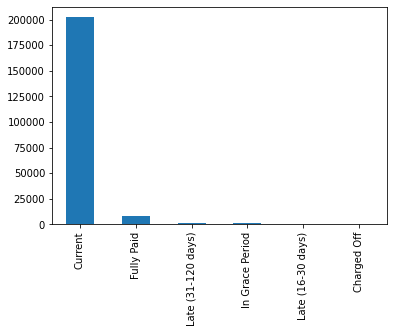

In [33]:
value_counts = df.loan_status.value_counts()
ax = value_counts.plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Loan Status")
loan_stats = []
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), str(int(i.get_height())), fontsize=10, ha='center', color='black')
    loan_stats.append(i.get_height())
plt.show()

We will start with building a simple model with two labels:

- 1 **The un-trustable loan taker** - Doesn't return the ful loan.
- 0 **The good loan taker** - Returns the loan.

   - The majority of cases are fully paid, we can go forward and assign them as classification 0 **The good loan taker**.
   - The cases that are *Charged off , In grace period or Default* are assigned with classification 1 **The un-trustable loan taker**
-
   - I'm not sure what does 'Does not meet the credit policy' means,  I'll drop those samples for now. in order to start with a simple model.
   - we will drop off all current and late cases. to keep it simple.
      - if I'll have time, I'll try to add those to the model, maybe as another class - for late loan takers for instance.
   Despite all the drops we will be left with a big enough amount of samples for the task. we should notice that the 0 label is far more abundant than the 1. we will need to address this issue in model training.

In [ ]:
drop_list = ["Current", "Late (31-120 days)", "Late (16-30 days)", "Does not meet the credit policy. Status:Fully Paid", "Does not meet the credit policy. Status:Charged Off"]
df = df[~df["loan_status"].isin(drop_list)]
df.loc[df['loan_status'] != 'Fully Paid', 'label'] = 1
df.loc[df['loan_status'] == 'Fully Paid', 'label'] = 0

Now let's drop all columns that has information that is not known at the time of loan application:


In [ ]:
drop_list =  ["chargeoff_within_12_mths",'hardship_flag',"last_pymnt_d", "tot_coll_amt","last_credit_pull_d","last_pymnt_amnt","collection_recovery_fee","recoveries","total_rec_late_fee","total_rec_int",'debt_settlement_flag',"total_rec_prncp","total_pymnt_inv","total_pymnt","funded_amnt","funded_amnt_inv","issue_d","loan_status","pymnt_plan","out_prncp","out_prncp_inv"]

df.drop(columns=drop_list , inplace=True)
pd.DataFrame(feature_dict, index=[0])[drop_list].T

In [ ]:
df.head(10)


we went down from 140 to 30 features!
and from 2m samples to 1.3m

In [ ]:
value_counts = df.label.value_counts()
ax = value_counts.plot(kind='bar')
plt.xticks(rotation=80)
plt.title("label")
loan_stats = []
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), str(int(i.get_height())), fontsize=10, ha='center', color='black')
    loan_stats.append(i.get_height())
plt.show()

let's exemine some more columns.
- **grade, sub_grade** Those are alphabetical codes that get a numerical representation as the interest rate. (column 'int_rate'). We will drop them too.
- **emp_title** : Although the data has 512694 different job title in it, I don't want to limit our model to only certain job names. also we don't want variance due to different spelling or job description.
- **zip_code, addr_state**: Although It's been [proved](https://www.deccanherald.com/content/660237/how-zip-code-can-determine.html) to be a good predictor, I want to keep my model 'humane' this time by giving opportunity to people from every neighborhood.
- **policy_code** - all values are 1 in this column. we will drop it.

In [ ]:
drop_list = ['grade', 'sub_grade','emp_title', 'zip_code', 'addr_state','policy_code']
df.drop(columns=drop_list, inplace=True)

Now we will look at each of the data columns and prepare it for our model.
we will start with checking which data should be transformed into numerical/ boolean format.

In [ ]:
for type in df.dtypes.unique():
    print(type)
    print(df.columns[df.dtypes == (type)])

we will transform as follows -
- term - change into 36 or 60 values
- emp_length - we will extract the amount of years. missing values will be filled with 0 assuming the borrower has no job or doesn't wish to share it with us.
- home_ownership - there are 6 unique values, we will use one hot unicoding.  fortunately there are no missing values.
- verification_status - there are 3 unique values: ['Source Verified' 'Verified' 'Not Verified']. we will check label correlation and decide if we treat both verified as one value and transform to boolean.
- Purpose - here there are 14 unique values. we might use one hot unicoding again. we need to further explore the correlation with the labels.
- title - this is an extra title that the loan applier adds as description, there are 61681 unique values. it is too specific fot us. the purpose column is enough.
- earliest_cr_line - we will extract the amount of years. fortunately there are no missing values.
- initial_list_status -  A loan listed as "forced" means that the loan was added to the platform due to demand from investors, while a loan listed as "whole" was added to the platform as a standard loan listing. This feature gives information on how the loan was introduced to the platform. we will turn it boolean.
- application_type - this needs more investigation
- disbursement_method - turn into boolean.

In [ ]:
df.drop(columns='title', inplace= True)
df[df.columns[df.dtypes == (object)]].sample(5)

## term , initial_list_status , disbursement_method -> boolean

In [ ]:
#term
term_mapping = {df.term.unique()[0]:36,df.term.unique()[1]: 60}
df.loc[:,'term'] = df['term'].map(term_mapping)

#initial_list_status
ils_mapping = {df.initial_list_status.unique()[0]:0,df.initial_list_status.unique()[1]: 1}
df.loc[:,'initial_list_status'] = df['initial_list_status'].map(ils_mapping)

#disbursement_method
disbursement_mapping = {df.disbursement_method.unique()[0]:0 , df.disbursement_method.unique()[1]:1}
df.loc[:,'disbursement_method'] = df['disbursement_method'].map(disbursement_mapping)


now before we start imputing we will see if there are some rows we should drop;

In [ ]:
missing_values = df.isnull().sum(axis=1)
mask_0 = df['label'] == 0
mask_1 = df['label'] == 1
plt.hist(missing_values[mask_0], bins=range(0,missing_values.max()+1), alpha=0.5, label='Label 0 - fully paid', color='blue')
plt.hist(missing_values[mask_1], bins=range(0,missing_values.max()+1), alpha=0.5, label='Label 1 - default', color='red')

plt.xlabel('Number of Missing Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


we will drop all rows with >20 missing values.

In [ ]:
df = df[df.isnull().sum(axis=1) <= 20]


# emp_length ,earliest_cr_line  -> nmb. of years
Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
samples that also have a missing job value will get 0 and others will be filled with the median.


In [ ]:
#emp_length - string -> int
unique_values = df['emp_length'].unique()
values = [5,0.5,10,3,4,1,8,np.nan,6,2,7,9]
mapping = {value: i for i, value in zip(values,unique_values)}
df.loc[:,'emp_length'] = df['emp_length'].map(mapping)

# Get the index of emp_title = NaN and emp_length is NaN and apply 0 to emp_length of those samples.
nan_mask = df_copy.emp_title[df.index].isna() * df.emp_length.isna()
df.loc[nan_mask, 'emp_length'] = 0

# left missing values are imputed with the median:
df['emp_length'].fillna(df['emp_length'].median() , inplace = True)

#earliest_cr_line - string -> int
def crop_year(x):
    year = x[-4:]
    current_year = datetime.datetime.now().year
    year = current_year - int(year)
    return year
df.loc[:,'earliest_cr_line'] = df.earliest_cr_line.apply(lambda x:crop_year(x))

let's look at the verification status correlation to our label:

In [ ]:
mask_0 = df['label'] == 0
mask_1 = df['label'] == 1

verification_status_labels = df.verification_status.unique()
verification_status_0 = [sum(df.verification_status[mask_0] == i) for i in verification_status_labels]
verification_status_1 = [sum(df.verification_status[mask_1] == i) for i in verification_status_labels]

fig, ax = plt.subplots()
index = np.arange(len(verification_status_labels))
bar_width = 0.35

bar1 = ax.bar(index, verification_status_0, bar_width, color='blue', alpha=0.5, label='Label 0 - fully paid')
bar2 = ax.bar(index + bar_width, verification_status_1, bar_width, color='red', alpha=0.5, label='Label 1 - default')

ax.set_xlabel('Verification Status')
ax.set_ylabel('Counts')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(verification_status_labels)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate("{:.0f}".format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.tight_layout()
plt.show()


should we transform the feature into boolean by merging source verified and verified or should we use one hot unicoding?
- we can see that if a sample is 'source Verified' it has  more chance to be fully paid.
we will use one-hot unicoding on this feature.

let's do the same for home_ownership, Purpose and application_type:

In [ ]:
purpose_labels = df.purpose.unique()
purpose_0 = [sum(df.purpose[mask_0] == i) for i in purpose_labels]
purpose_1 = [sum(df.purpose[mask_1] == i) for i in purpose_labels]

fig, ax = plt.subplots()
index = np.arange(len(purpose_labels))
bar_width = 0.35

bar1 = ax.bar(index, purpose_0, bar_width, color='blue', alpha=0.5, label='Label 0 - fully paid')
bar2 = ax.bar(index + bar_width, purpose_1, bar_width, color='red', alpha=0.5, label='Label 1 - default')

ax.set_xlabel('Purpose')
ax.set_ylabel('Counts')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(purpose_labels, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

we can see that most of the loans are taken in porpuse of debt consolidation. notice we have some values with very low amount of data at the right part of the graph.
we are going to turn this feature into one hot unicoding. The values with low amount of samples will get meaningless weight. so we will combine them into one value 'other'.


In [ ]:
mask = df.purpose.isin(['house', 'car','home_improvement', 'moving', 'small_business', 'vacation','medical', 'major_purchase', 'renewable_energy', 'wedding','educational'])
df.purpose[mask] = 'other'

purpose_labels = df.purpose.unique()
purpose_0 = [sum(df.purpose[mask_0] == i) for i in purpose_labels]
purpose_1 = [sum(df.purpose[mask_1] == i) for i in purpose_labels]

fig, ax = plt.subplots()
index = np.arange(len(purpose_labels))
bar_width = 0.35

bar1 = ax.bar(index, purpose_0, bar_width, color='blue', alpha=0.5, label='Label 0 - fully paid')
bar2 = ax.bar(index + bar_width, purpose_1, bar_width, color='red', alpha=0.5, label='Label 1 - default')

ax.set_xlabel('Purpose')
ax.set_ylabel('Counts')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(purpose_labels, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

mask_0 = df['label'] == 0
mask_1 = df['label'] == 1

# Plot for home_ownership feature
ax1.hist(df.home_ownership[mask_0], alpha=0.5, label='Label 0 - fully paid', color='blue')
ax1.hist(df.home_ownership[mask_1], alpha=0.5, label='Label 1 - default', color='red')
ax1.set_xlabel('home_ownership')
ax1.set_ylabel('Frequency')
ax1.legend()

# Plot for application_type feature
ax2.hist(df.application_type[mask_0], alpha=0.5, label='Label 0 - fully paid', color='blue')
ax2.hist(df.application_type[mask_1], alpha=0.5, label='Label 1 - default', color='red')
ax2.set_xlabel('application_type')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.show()


home_ownership - we will do the same for ANY,NONE and OTHER and combine them into 'OTHER'.
on application type - there is a small amount of group applications, in this case I'm not sure whos data is in the dataset and how I should treat that case. we will drop it this time and compromise our data to deal only with lone loan takers.

In [ ]:
mask = df.purpose.isin(['ANY', 'NONE','OTHER'])
df.home_ownership[mask] = 'OTHER'

df = df[df.application_type != 'Joint App']
df.drop(columns='application_type', inplace=True)


now lets run the one hot encoding for the two last features 'home_ownership' , 'purpose':


In [ ]:
df = pd.get_dummies(df, columns=['purpose','home_ownership', 'verification_status'], prefix=['purpose' , 'home_ownership','verification_status'])

let's impute some more missing values:

In [ ]:
# Calculate the percentage of Nan values for each feature
nan_prec = pd.DataFrame(((df.isna()).sum() / df.shape[0])*100 , columns=['% Nan'])
nan_prec['Description'] = [feature_dict.get(nan_prec.index[i]) for i in range(nan_prec.shape[0])]
pd.options.display.max_rows = 100
nan_prec[nan_prec['% Nan']>0]

### i'm sick of data exploration just imputed all and will deal with it later.

In [ ]:
for feature in nan_prec[nan_prec['% Nan']>0].index :
    df[feature].fillna(df[feature].median(), inplace=True)


The data is ready! we will save a copy -

In [ ]:
# Save DataFrame to CSV
df.to_csv('preprocessed_data.csv', index=True)

## Building a model

In [ ]:
# Load DataFrame from CSV
X = pd.read_csv('preprocessed_data.csv' , index_col= 0)
Y = X['label']
X.drop(columns='label', inplace=True)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

lets check the that split is evenly disturbuted:

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(10,10))
ax = axs.ravel()
for idx in range(len(ax)):
    ax[idx].hist(x_train.iloc[:, idx], density=True, alpha=0.5, label='train')
    ax[idx].hist(x_test.iloc[:, idx], density=True, alpha=0.5, label='test')
    ax[idx].legend(loc='upper right')
    ax[idx].set_xlabel(x_train.columns[idx])
plt.show()

plt.hist(y_train, density=True, alpha=0.5, label='train')
plt.hist(y_test, density=True, alpha=0.5, label='test')
plt.legend(loc='upper right')
plt.xlabel('label')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
y_train.value_counts().plot(kind="pie", labels=['Fully paid', 'Default'], autopct='%1.1f%%', ax=axes[0])
y_test.value_counts().plot(kind="pie", labels=['Normal', 'Default'], autopct='%1.1f%%', ax=axes[1])
axes[0].set(title ="y_train")
axes[1].set(title ="y_test")
plt.show()


In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# SVM

In [ ]:
# define search space
params = dict()
params['C'] = (1e-6, 100.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['degree'] = (1,5)
params['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the search
search = BayesSearchCV(estimator=SVC(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(x_train, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)



In [ ]:
y_pred_test = search.predict(x_test)
y_pred_proba_test = search.predict_proba(x_test)
plot_confusion_matrix(search,x_test,y_test, cmap=plt.cm.Blues)
plt.grid(False)
st1 = stats(y_test, y_pred_test, y_pred_proba_test )
print('AUC is {:.4f}. \nF1 is {:.4f}.  \nACC is {:.4f}.  '.format(st1[-1],st1[-2],st1[-3]))

## Random forest

In [ ]:
rfc = RandomForestClassifier(random_state=random_state)
params = dict()
params['C'] = (1e-6, 100.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['degree'] = (1,5)
params['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
criterion = ['gini', 'entropy', 'log_loss']

max_depth = [3, 5, 6]
max_features = [2, 3, 4]
pipe3 = Pipeline(steps=[('scale', StandardScaler()), ('rfc', rfc )])
RFCCV = GridSearchCV(estimator=pipe3,
                   param_grid={'rfc__criterion': criterion, 'rfc__max_depth': max_depth , 'rfc__max_features': max_features},
                   scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
                   cv=skf, refit='roc_auc', verbose=3, return_train_score=True)

RFCCV.fit(X_train, (np.array(y_train)).flatten())



In [ ]:
# define search space
params = dict()
params['C'] = (1e-6, 100.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['degree'] = (1,5)
params['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the search
search = BayesSearchCV(estimator=SVC(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(x_train, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)



In [ ]:
rfc = RandomForestClassifier(random_state=random_state)
params = dict()
params['criterion'] = ['gini', 'entropy', 'log_loss']
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['degree'] = (1,5)
params['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
params['criterion'] =  = ['gini', 'entropy', 'log_loss']

rfc = RandomForestClassifier(random_state=random_state)
criterion = 
max_features = [2, 3, 4]
max_depth = [3, 5, 6]
max_features = [2, 3, 4]
pipe3 = Pipeline(steps=[('scale', StandardScaler()), ('rfc', rfc )])
RFCCV = GridSearchCV(estimator=pipe3,
                   param_grid={'rfc__criterion': criterion, 'rfc__max_depth': max_depth , 'rfc__max_features': max_features},
                   scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
                   cv=skf, refit='roc_auc', verbose=3, return_train_score=True)

RFCCV.fit(X_train, (np.array(y_train)).flatten())

